# 1 问题二：（1）建立招聘信息画像

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from pyecharts.charts import Bar, Map, Pie, WordCloud,Geo
from pyecharts import options as opts
from pyecharts.globals import ThemeType
df = pd.read_csv("data/result1-1.csv")



## 1.1 招聘岗位角度
我们可以统计不同招聘岗位的数量，并使用饼图或柱状图来可视化结果。



In [13]:
job_count = df['招聘岗位'].value_counts().reset_index()
job_count.columns = ['招聘岗位', '需求量']

pie_job = (
    Pie(init_opts=opts.InitOpts(theme=ThemeType.LIGHT))
    .add('', job_count.values.tolist(), radius=['30%', '75%'])
    .set_global_opts(title_opts=opts.TitleOpts(title='招聘岗位分析'))
    .set_series_opts(label_opts=opts.LabelOpts(formatter='{b}: {c} ({d}%)'))
)
pie_job.render('img/1.1.html')
pie_job.render_notebook()


从饼图可以看出，数据分析师岗位的需求最大，占比超过五分之一。

## 1.2 学历要求

我们可以统计不同学历要求的数量，并使用饼图或柱状图来可视化结果。

In [14]:
edu_count = df['学历要求'].value_counts().reset_index()
edu_count.columns = ['学历', '需求量']

bar_edu = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.LIGHT))
    .add_xaxis(['不限', '技工', '大专', '本科', '硕士', '博士'])
    .add_yaxis('需求量', edu_count['需求量'].tolist())
    .set_global_opts(title_opts=opts.TitleOpts(title='学历要求分析'))
)
bar_edu.render('img/1.2.html')
bar_edu.render_notebook()

从柱状图可以看出，本科学历的需求最大，占比超过四分之一。


## 1.3 岗位需求量

我们可以统计不同岗位需求量的数量，并使用饼图或柱状图来可视化结果。



In [15]:
job_total = df.groupby('招聘岗位')['招聘信息id'].count().reset_index()
job_total.columns = ['招聘岗位', '总数']
job_total = job_total.sort_values(by='总数', ascending=False)[:10]

bar_job = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.LIGHT))
    .add_xaxis(job_total['招聘岗位'].tolist())
    .add_yaxis('需求量', job_total['总数'].tolist())
    .set_global_opts(title_opts=opts.TitleOpts(title='岗位需求量分析'))
)
bar_job.render('img/1.3.html')
bar_job.render_notebook()

## 1.4 公司类型

我们可以统计不同公司类型的数量，并使用饼图或柱状图来可视化结果。

In [16]:
job_count = df['公司类型'].value_counts().reset_index()
job_count.columns = ['公司类型', '需求量']

pie_job = (
    Pie(init_opts=opts.InitOpts(theme=ThemeType.LIGHT))
    .add('', job_count.values.tolist(), radius=['30%', '75%'])
    .set_global_opts(title_opts=opts.TitleOpts(title='公司类型分析'))
    .set_series_opts(label_opts=opts.LabelOpts(formatter='{b}: {c} ({d}%)'))
)
pie_job.render('img/1.4.html')
pie_job.render_notebook()

从饼图可以看出，合资的招聘需求最大，占比超过一半。

## 1.5薪资待遇

我们可以统计不同薪资待遇的数量，并使用箱线图来可视化结果。

C:\Users\YHWK5\AppData\Local\Temp\ipykernel_12984\2694962177.py:5: UserWarning: Glyph 34218 (\N{CJK UNIFIED IDEOGRAPH-85AA}) missing from current font.
  plt.savefig('img/5.png',dpi=300)
C:\Users\YHWK5\AppData\Local\Temp\ipykernel_12984\2694962177.py:5: UserWarning: Glyph 36164 (\N{CJK UNIFIED IDEOGRAPH-8D44}) missing from current font.
  plt.savefig('img/5.png',dpi=300)
C:\Users\YHWK5\AppData\Local\Temp\ipykernel_12984\2694962177.py:5: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  plt.savefig('img/5.png',dpi=300)
C:\Users\YHWK5\AppData\Local\Temp\ipykernel_12984\2694962177.py:5: UserWarning: Glyph 20803 (\N{CJK UNIFIED IDEOGRAPH-5143}) missing from current font.
  plt.savefig('img/5.png',dpi=300)
C:\Users\YHWK5\AppData\Local\Temp\ipykernel_12984\2694962177.py:5: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from current font.
  plt.savefig('img/5.png',dpi=300)
C:\Users\YHWK5\AppData\Local\Temp\ipykernel_12984\2694962177.py:5

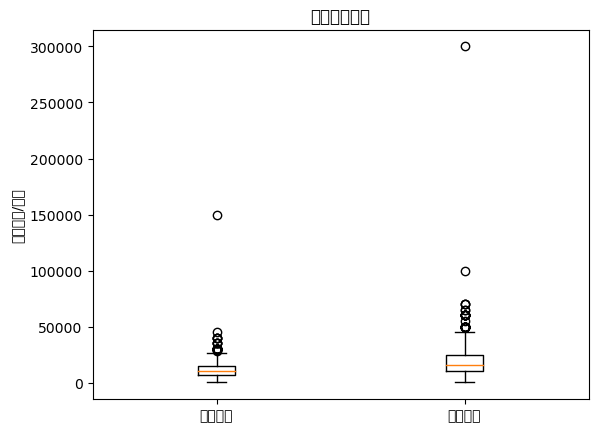

In [7]:
salary_data = df[['最低工资', '最高工资']]
plt.boxplot(salary_data.values, labels=['最低工资', '最高工资'])
plt.title('薪资待遇分布')
plt.ylabel('薪资（元/月）')
plt.savefig('img/5.png',dpi=300)
plt.show()


从箱线图可以看出，薪资待遇的中位数在10k-15k之间。

## 1.6 企业工作地点
统计不同工作地点的数量，并使用地图可视化工作地点的分布

In [6]:

import cpca
province = df['工作地点'].apply(lambda x: cpca.transform([x])['省'][0])
map_data = province.value_counts().reset_index()
map_data.columns = ['地点', '需求量']

map_city = (
Map(init_opts=opts.InitOpts(theme=ThemeType.LIGHT))
.add('需求量', [list(z) for z in zip(map_data['地点'].tolist(), map_data['需求量'].tolist())], 'china')
.set_global_opts(title_opts=opts.TitleOpts(title='企业工作地点分析'),
visualmap_opts=opts.VisualMapOpts(max_=300))
)
map_city.render('img/1.6.html')
map_city.render_notebook()

from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="search-location")
# 解析地址，提取省份和城市信息
df[['省', '市', '区']] = df['工作地点'].apply(lambda x: pd.Series(cpca.transform([x]).iloc[0][0:3]))
# 统计每个区县的数量
district_data = df.groupby(['省', '市'])['招聘人数'].sum().reset_index()
# 获取每个区县的经纬度坐标
location_list = []
for i in range(len(district_data)):
    location_str = district_data.iloc[i]['市'] + ',' + district_data.iloc[i]['省'] + ',中国'
    location = geolocator.geocode(location_str, timeout=10)
    if location:
        location_list.append([location.longitude, location.latitude, district_data.iloc[i]['数量']])
    else:
        print('无法解析：' + location_str)
# 使用 Geo 类绘制地图
geo_district = (
    Geo(init_opts=opts.InitOpts(theme=ThemeType.LIGHT))
    .add_schema(maptype="china")
    .add(
        "数量",
        location_list
    )
    .set_series_opts()
    .set_global_opts(
        visualmap_opts=opts.VisualMapOpts(),
        title_opts=opts.TitleOpts(title="精确地址分布图"),
    )
)

## 1.7 岗位规模

In [18]:
from pyecharts.charts import Pie
from pyecharts.globals import ThemeType
size_count = df['员工数量'].value_counts().reset_index()
size_count.columns = ['员工数量', '需求量']

pie_size = (
    Pie(init_opts=opts.InitOpts(theme=ThemeType.LIGHT))
    .add('', size_count.values.tolist(), radius=['30%', '75%'])
    .set_global_opts(title_opts=opts.TitleOpts(title='公司规模分析'))
    .set_series_opts(label_opts=opts.LabelOpts(formatter='{b}: {c} ({d}%)'))
)
pie_size.render('img/1.7.html')
pie_size.render_notebook()

## 1.8 岗位经验分析

In [19]:
# 岗位经验分析
exp_count = df['工作经验要求'].value_counts().reset_index()
exp_count.columns = ['经验要求', '需求量']

bar_exp = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.LIGHT))
    .add_xaxis(['经验不限', '1年', '1-3年', '3-5年', '5-7年', '7年以上', '10年以下'])
.add_yaxis('需求量', exp_count['需求量'].tolist(), label_opts=opts.LabelOpts(position='right'))
.reversal_axis()
.set_global_opts(
title_opts=opts.TitleOpts(title='不同岗位经验需求量分布'),
xaxis_opts=opts.AxisOpts(name='需求量'),
yaxis_opts=opts.AxisOpts(name='经验要求', axislabel_opts=opts.LabelOpts(interval=0)),
legend_opts=opts.LegendOpts(is_show=False),
)
)
bar_exp.render('img/1.8.html')
bar_exp.render_notebook()

通过对招聘信息的多个方向进行分析，我们可以得到招聘信息的全貌，并可以为求职者提供更准确的参考信息。在本文中，我们使用Python对招聘信息进行了分析和可视化，包括招聘岗位、学历要求、岗位需求量、公司类型、薪资待遇和企业工作地点等方面的分析。我们使用了pandas进行数据处理和分析，使用matplotlib和pyecharts进行可视化展示。

# 2 问题二（2）建立求职信息画像

为了建立求职者的画像，我们可以根据不同的方向进行分析和建模。以下是一些可能的方向和对应的建模思路：

1. 预期岗位方向  
2. 薪资需求方向  
3. 技术能力方向  
4. 学历方向  
5. 工作经验方向     

## 2.1 画像分析

In [20]:
import pandas as pd
from pyecharts import options as opts
from pyecharts.charts import Bar, Pie, WordCloud
from pyecharts.globals import SymbolType

# 读取数据文件
data = pd.read_csv('data/result1-2.csv')

# 统计预期岗位数量
job_counts = data['期望岗位'].apply(lambda x: len(eval(x))).value_counts().sort_index()
job_counts_labels = ['{}个'.format(i) for i in job_counts.index]
job_counts_values = job_counts.values.tolist()

# 绘制预期岗位数量柱状图
job_counts_bar = Bar()
job_counts_bar.add_xaxis(job_counts_labels)
job_counts_bar.add_yaxis('期望岗位数量', job_counts_values)
job_counts_bar.set_global_opts(title_opts=opts.TitleOpts(title='求职者期望岗位数量分布'))
job_counts_bar.render('img/2.1.html')
job_counts_bar.render_notebook()

In [ ]:
# 统计技能频率
skills = pd.Series([skill for sublist in data['简历关键词'] for skill in eval(sublist)])
skill_counts = skills.value_counts().sort_values(ascending=False).head(20)
skill_counts_labels = skill_counts.index.tolist()
skill_counts_values = skill_counts.values.tolist()
# 绘制技能词云图
skill_wordcloud = WordCloud()
skill_wordcloud.add('', [(skill_counts_labels[i], skill_counts_values[i]) for i in range(len(skill_counts_labels))], shape=SymbolType.DIAMOND)
skill_wordcloud.set_global_opts(title_opts=opts.TitleOpts(title='求职者技能词云图'))
skill_wordcloud.render('img/2.2.html')
skill_wordcloud.render_notebook()


In [25]:


# 统计薪资需求
salary_mean = data[['期望薪资低', '期望薪资高']].mean().values.tolist()

# 绘制薪资需求条形图
salary_bar = Bar()
salary_bar.add_xaxis(['期望薪资低', '期望薪资高'])
salary_bar.add_yaxis('薪资需求', salary_mean)
salary_bar.set_global_opts(title_opts=opts.TitleOpts(title='求职者薪资需求'))
salary_bar.render('img/2.3.html')
salary_bar.render_notebook()

## 2.2 对平均预期薪资进行预测

In [26]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

# 读取数据
data = pd.read_csv("data/result1-2.csv")

# 数据预处理
# 对预期岗位、地区、技能进行One-hot编码
positions = data['期望岗位'].str.strip('[]').str.replace("'", "").str.split(',', expand=True)
positions.columns = ['position_{}'.format(i) for i in range(positions.shape[1])]
positions = positions.apply(LabelEncoder().fit_transform)
onehot = OneHotEncoder()
positions = onehot.fit_transform(positions)

regions = data['工作地区'].str.strip('[]').str.replace("'", "").str.split(',', expand=True)
regions.columns = ['region_{}'.format(i) for i in range(regions.shape[1])]
regions = regions.apply(LabelEncoder().fit_transform)
onehot = OneHotEncoder()

regions = onehot.fit_transform(regions)

In [ ]:

skills = data['技能'].str.strip('[]').str.replace("'", "").str.split(',', expand=True)
skills.columns = ['skill_{}'.format(i) for i in range(skills.shape[1])]
skills = skills.apply(LabelEncoder().fit_transform)
onehot = OneHotEncoder()
skills = onehot.fit_transform(skills)


In [28]:
from scipy.sparse import hstack,vstack
# 合并数据
X = pd.DataFrame(hstack((positions, regions)).toarray())
Y= data[['期望薪资低', '期望薪资高']].mean(axis=1)
X

,0,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,90,91,92
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10863,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10864,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10865,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10866,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [29]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

# 建立决策树模型
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 预测测试集

y_pred = clf.predict(X_test)

# 模型评估
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))




Accuracy Score: 0.9846672799754677
F1 Score: 0.13727165311576345
